In [2]:
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL
import pandas as pd

import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import numpy as np


In [3]:
client = Client().create(source='cerc')
coll = client.collection

for i in range(16):
    print(coll[i][0])

Fetching Metadata. Please Wait ...
---------- Table:0 ----------
Name:		agents 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		agents_by_pk 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		bixi_stations 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		bixi_trips 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		building_footprint_ms 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		building_footprint_mtl 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		building_lots 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		census_divisions 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		census_subdivisions 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		census_tracts 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		dissemination_areas 
Description:	 
Format:		CSV 

---------- Table:0 ----------
Name:		disse

In [3]:
tb=coll[7][0]
print(tb)
query_point_x,query_point_y="-73.570552324815","45.530402345761175"
query_radius=0.1
query_geometry = PointGQL().point(-73.580552324815,45.530402345761175)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_lots = tb.query_simple( **query_options )
print("selecting {} buildings in {} m radius of point {},{}".format(len(data_lots),round(query_radius*111100),query_point_x,query_point_y))
data_lots.head()

---------- Table:0 ----------
Name:		census_divisions 
Description:	 
Format:		CSV 

selecting 3 buildings in 11110 m radius of point -73.570552324815,45.530402345761175


,CDNAME,CDTYPE,CDUID,PRNAME,PRUID,geom,index
0,Longueuil,TÉ,2458,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",68
1,Laval,TÉ,2465,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",75
2,Montréal,TÉ,2466,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",76


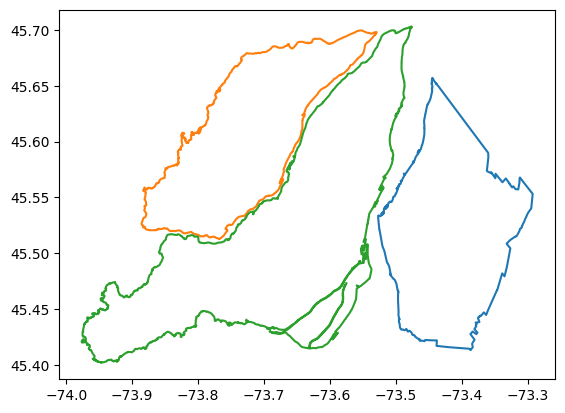

In [4]:
for i in range(len(data_lots)):
    vertex = data_lots.iloc[i,:]["geom"]["coordinates"][0][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)

---------- Table:0 ----------
Name:		census_subdivisions 
Description:	 
Format:		CSV 

selecting 11 buildings in 11110 m radius of point -73.570552324815,45.530402345761175


,CCSNAME,CCSUID,CDNAME,CDTYPE,CDUID,CMANAME,CMAPUID,CMATYPE,CMAUID,CSDNAME,CSDTYPE,CSDUID,ERNAME,ERUID,PRNAME,PRUID,SACCODE,SACTYPE,geom,index
0,Longueuil,2458227,Longueuil,TÉ,2458,Montréal,24462,B,462,Brossard,V,2458007,Montérégie,2435,Quebec / Québec,24,462,1,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",1720
1,Longueuil,2458227,Longueuil,TÉ,2458,Montréal,24462,B,462,Longueuil,V,2458227,Montérégie,2435,Quebec / Québec,24,462,1,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",1722
2,Longueuil,2458227,Longueuil,TÉ,2458,Montréal,24462,B,462,Saint-Lambert,V,2458012,Montérégie,2435,Quebec / Québec,24,462,1,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",1748
3,Montréal,2466023,Montréal,TÉ,2466,Montréal,24462,B,462,Côte-Saint-Luc,V,2466058,Montréal,2440,Quebec / Québec,24,462,1,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",1760
4,Montréal,2466023,Montréal,TÉ,2466,Montréal,24462,B,462,Hampstead,V,2466062,Montréal,2440,Quebec / Québec,24,462,1,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",1761


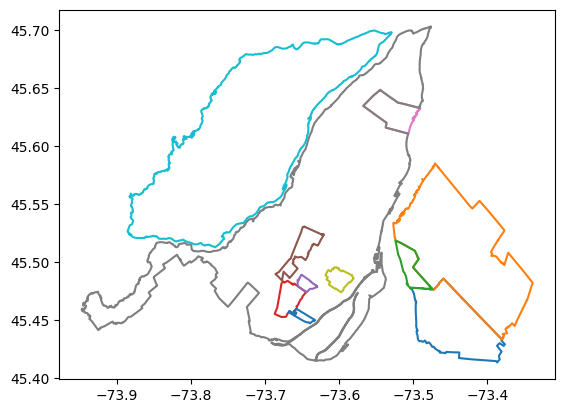

In [5]:
tb=coll[8][0]
print(tb)
query_point_x,query_point_y="-73.570552324815","45.530402345761175"
query_radius=0.1
query_geometry = PointGQL().point(-73.580552324815,45.530402345761175)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_lots = tb.query_simple( **query_options )
print("selecting {} buildings in {} m radius of point {},{}".format(len(data_lots),round(query_radius*111100),query_point_x,query_point_y))
display(data_lots.head())

for i in range(len(data_lots)):
    vertex = data_lots.iloc[i,:]["geom"]["coordinates"][0][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)


---------- Table:0 ----------
Name:		census_tracts 
Description:	 
Format:		CSV 

selecting 9 tracts in 556 m radius of point -73.57055894277187,45.530384608361125


,CMANAME,CMAPUID,CMATYPE,CMAUID,CTNAME,CTUID,PRNAME,PRUID,geom,index
0,Montréal,24462,B,462,0145.00,462014500,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",360
1,Montréal,24462,B,462,0149.00,462014900,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",364
2,Montréal,24462,B,462,0150.00,462015000,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",365
3,Montréal,24462,B,462,0151.00,462015100,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",366
4,Montréal,24462,B,462,0148.00,462014800,Quebec / Québec,24,"{'type': 'MultiPolygon', 'crs': {'type': 'name...",363


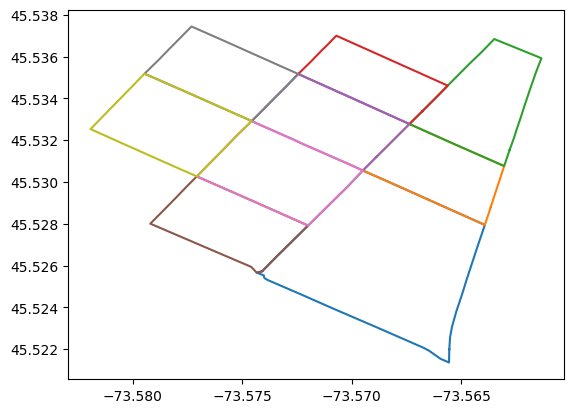

In [17]:
tb=coll[9][0]
print(tb)
query_point_x,query_point_y="-73.57055894277187","45.530384608361125"
query_radius=.005
query_geometry = PointGQL().point(-73.57055894277187,45.530384608361125)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_tracts = tb.query_simple( **query_options )
print("selecting {} tracts in {} m radius of point {},{}".format(len(data_tracts),round(query_radius*111100),query_point_x,query_point_y))
display(data_tracts.head())

for i in range(len(data_tracts)):
    vertex = data_tracts.iloc[i,:]["geom"]["coordinates"][0][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)


---------- Table:0 ----------
Name:		building_lots 
Description:	 
Format:		CSV 

selecting 1062 buildings in 556 m radius of point -73.57055894277187,45.530384608361125


,borough_id,building_number,built_area,dwelling_number,firstletter_apt,geom,index,land_area,landuse_code,landuse_text,lastletter_apt,max_floors,municipality_code,nad83_registration,street_name,street_number,uid,unit_category,unit_number,year_built
0,REM21,1968,277,4,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",41,171,1000,Logement,0,3,50,9943-64-5537-4-000-0000,rue Gauthier (MTL),1974,1035321,Régulier,0,1910
1,REM21,1962,258,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",42,171,1000,Logement,0,3,50,9943-64-5131-6-000-0000,rue Gauthier (MTL),1966,1035322,Régulier,0,1910
2,REM21,1835,660,0,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",136,372,5010,Immeuble commercial,0,2,50,9843-97-9944-0-000-0000,avenue du Mont-Royal Est (MTL),1843,1034340,Régulier,0,1900
3,REM21,1825,517,0,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",137,328,5010,Immeuble commercial,0,0,50,9843-97-9131-4-000-0000,avenue du Mont-Royal Est (MTL),1831,1034342,Régulier,0,1900
4,REM21,1886,199,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",162,192,1000,Logement,0,2,50,9943-44-5793-5-000-0000,rue Rachel Est (MTL),1888,1035289,Régulier,0,1900


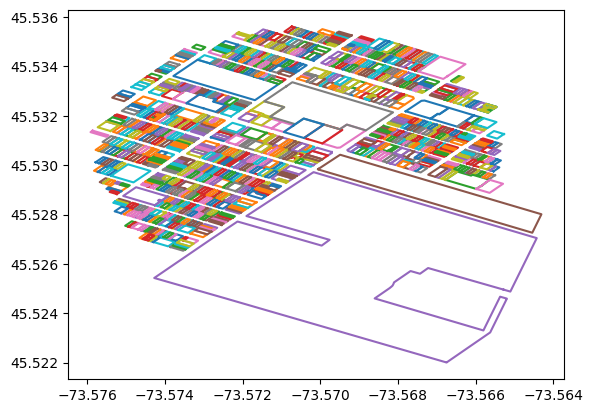

In [18]:
tb=coll[6][0]
print(tb)
query_point_x,query_point_y="-73.57055894277187","45.530384608361125"
query_radius=0.005
query_geometry = PointGQL().point(-73.57055894277187,45.530384608361125)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_building_lots = tb.query_simple( **query_options )
print("selecting {} buildings in {} m radius of point {},{}".format(len(data_building_lots),round(query_radius*111100),query_point_x,query_point_y))
display(data_building_lots.head())

for i in range(len(data_building_lots)):
    vertex = data_building_lots.iloc[i,:]["geom"]["coordinates"][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)

In [19]:
temp_dict=dict([])
for i, CTname in enumerate(data_tracts["CTNAME"]):
    # temp_list=[]
    polya=Polygon(data_tracts[data_tracts.loc[:,"CTNAME"]==CTname]["geom"][i]["coordinates"][0][0])
    
    for j in data_building_lots.index:
        polyb=Polygon(data_building_lots.iloc[j,:]["geom"]["coordinates"][0])
        print("i:",i,"j:",j,polya.contains(polyb))
        if polya.contains(polyb):
            # temp_list.append(j)
            temp_dict[j]=CTname
        # plt.plot(*polya.exterior.xy)
    # temp_dict[CTname]=temp_list
    # plt.plot(*polyb.exterior.xy)
    # plt.show()
temp_dict

i: 0 j: 0 False
i: 0 j: 1 False
i: 0 j: 2 False
i: 0 j: 3 False
i: 0 j: 4 False
i: 0 j: 5 False
i: 0 j: 6 False
i: 0 j: 7 False
i: 0 j: 8 False
i: 0 j: 9 False
i: 0 j: 10 False
i: 0 j: 11 False
i: 0 j: 12 False
i: 0 j: 13 False
i: 0 j: 14 False
i: 0 j: 15 False
i: 0 j: 16 False
i: 0 j: 17 False
i: 0 j: 18 False
i: 0 j: 19 False
i: 0 j: 20 False
i: 0 j: 21 False
i: 0 j: 22 False
i: 0 j: 23 False
i: 0 j: 24 False
i: 0 j: 25 False
i: 0 j: 26 False
i: 0 j: 27 False
i: 0 j: 28 False
i: 0 j: 29 False
i: 0 j: 30 False
i: 0 j: 31 False
i: 0 j: 32 False
i: 0 j: 33 False
i: 0 j: 34 False
i: 0 j: 35 False
i: 0 j: 36 False
i: 0 j: 37 False
i: 0 j: 38 False
i: 0 j: 39 False
i: 0 j: 40 False
i: 0 j: 41 False
i: 0 j: 42 False
i: 0 j: 43 False
i: 0 j: 44 False
i: 0 j: 45 False
i: 0 j: 46 False
i: 0 j: 47 False
i: 0 j: 48 False
i: 0 j: 49 False
i: 0 j: 50 False
i: 0 j: 51 False
i: 0 j: 52 False
i: 0 j: 53 False
i: 0 j: 54 False
i: 0 j: 55 False
i: 0 j: 56 False
i: 0 j: 57 False
i: 0 j: 58 False
i: 0 j:

{1055: '0145.00',
 0: '0149.00',
 1: '0149.00',
 4: '0149.00',
 5: '0149.00',
 7: '0149.00',
 8: '0149.00',
 9: '0149.00',
 10: '0149.00',
 11: '0149.00',
 12: '0149.00',
 13: '0149.00',
 15: '0149.00',
 16: '0149.00',
 17: '0149.00',
 18: '0149.00',
 19: '0149.00',
 20: '0149.00',
 21: '0149.00',
 22: '0149.00',
 23: '0149.00',
 27: '0149.00',
 31: '0149.00',
 33: '0149.00',
 34: '0149.00',
 35: '0149.00',
 36: '0149.00',
 37: '0149.00',
 38: '0149.00',
 39: '0149.00',
 40: '0149.00',
 41: '0149.00',
 42: '0149.00',
 43: '0149.00',
 44: '0149.00',
 45: '0149.00',
 46: '0149.00',
 47: '0149.00',
 48: '0149.00',
 49: '0149.00',
 50: '0149.00',
 51: '0149.00',
 52: '0149.00',
 53: '0149.00',
 54: '0149.00',
 55: '0149.00',
 57: '0149.00',
 58: '0149.00',
 62: '0149.00',
 63: '0149.00',
 64: '0149.00',
 65: '0149.00',
 67: '0149.00',
 68: '0149.00',
 69: '0149.00',
 70: '0149.00',
 71: '0149.00',
 73: '0149.00',
 74: '0149.00',
 75: '0149.00',
 76: '0149.00',
 77: '0149.00',
 78: '0149.00

In [20]:
temp_data=data_building_lots.copy()
temp_data["Tract"]=np.nan
temp_data.head()
len(temp_data)

1062

In [21]:
for j in temp_dict:
    # print("j:",j)
    # print("tract",temp_dict[j])
    temp_data["Tract"][j]=temp_dict[j]
    # print(temp_data["Tract"][j])
    

C:\Users\msham\AppData\Local\Temp\ipykernel_7868\155028858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data["Tract"][j]=temp_dict[j]


In [22]:
temp_data.head()

,borough_id,building_number,built_area,dwelling_number,firstletter_apt,geom,index,land_area,landuse_code,landuse_text,...,max_floors,municipality_code,nad83_registration,street_name,street_number,uid,unit_category,unit_number,year_built,Tract
0,REM21,1968,277,4,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",41,171,1000,Logement,...,3,50,9943-64-5537-4-000-0000,rue Gauthier (MTL),1974,1035321,Régulier,0,1910,0149.00
1,REM21,1962,258,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",42,171,1000,Logement,...,3,50,9943-64-5131-6-000-0000,rue Gauthier (MTL),1966,1035322,Régulier,0,1910,0149.00
2,REM21,1835,660,0,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",136,372,5010,Immeuble commercial,...,2,50,9843-97-9944-0-000-0000,avenue du Mont-Royal Est (MTL),1843,1034340,Régulier,0,1900,0156.00
3,REM21,1825,517,0,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",137,328,5010,Immeuble commercial,...,0,50,9843-97-9131-4-000-0000,avenue du Mont-Royal Est (MTL),1831,1034342,Régulier,0,1900,0156.00
4,REM21,1886,199,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",162,192,1000,Logement,...,2,50,9943-44-5793-5-000-0000,rue Rachel Est (MTL),1888,1035289,Régulier,0,1900,0149.00


In [23]:
for j in temp_data["Tract"]:
    temp=temp_data[temp_data["Tract"]==j]

    for i in range(len(temp)):
        vertex = temp.iloc[i,:]["geom"]["coordinates"][0]
        polygon1=Polygon(vertex)
        plt.plot(*polygon1.exterior.xy)

Error in callback <function flush_figures at 0x000001C592B4F010> (for post_execute):


KeyboardInterrupt: 

In [24]:
tract147=temp_data[temp_data["Tract"]=="0147.00"]
tract147=tract147[tract147["year_built"]<2023]

tract147["year_built"].mean()
len(tract147)
tract147["dwelling_number"].sum()


1345

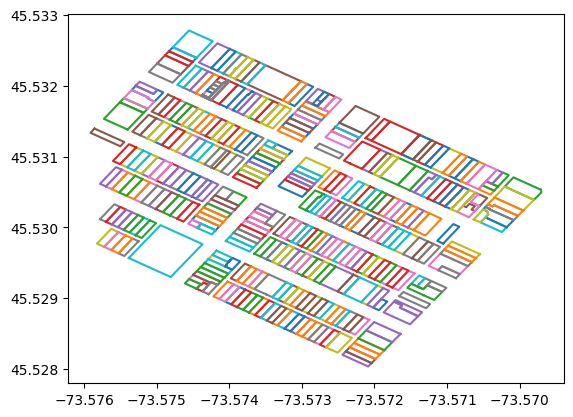

In [25]:
for i in range(len(tract147)):
    vertex = tract147.iloc[i,:]["geom"]["coordinates"][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)

In [34]:
tract147_res=tract147[tract147["landuse_code"]==1000]

In [35]:
tract147_res

,borough_id,building_number,built_area,dwelling_number,firstletter_apt,geom,index,land_area,landuse_code,landuse_text,...,max_floors,municipality_code,nad83_registration,street_name,street_number,uid,unit_category,unit_number,year_built,Tract
14,REM21,1599,59,1,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",1425,53,1000,Logement,...,1,50,9943-04-7667-3-001-0004,rue Marie-Anne Est (MTL),1599,5066055,Condominium,0,1925,0147.00
24,REM21,4324,251,1,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",1806,72,1000,Logement,...,1,50,9943-02-5162-1-001-0003,rue Garnier (MTL),4324,1123649,Condominium,0,1900,0147.00
59,REM21,4218,454,1,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",4602,52,1000,Logement,...,1,50,9943-34-1120-6-001-0004,avenue Papineau (MTL),4218,5011916,Condominium,0,1910,0147.00
115,REM21,1587,345,3,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",15145,232,1000,Logement,...,3,50,9943-04-6357-2-000-0000,rue Marie-Anne Est (MTL),1591,1033963,Régulier,0,1900,0147.00
131,REM21,4255,1358,29,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",16742,718,1000,Logement,...,3,50,9943-12-3564-9-000-0000,rue Garnier (MTL),4255,1029510,Régulier,0,1965,0147.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,REM21,4358,190,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",330902,85,1000,Logement,...,3,50,9943-04-6475-2-000-0000,rue Marquette (MTL),4360,1030058,Régulier,0,1915,0147.00
1046,REM21,4462,343,3,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",331152,274,1000,Logement,...,3,50,9943-06-1308-5-000-0000,avenue Papineau (MTL),4466,1030599,Régulier,0,1912,0147.00
1048,REM21,4382,311,1,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",332193,277,1000,Logement,...,0,50,9943-05-9057-2-000-0000,avenue Papineau (MTL),4386,1030586,Régulier,0,1941,0147.00
1049,REM21,4311,541,6,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",332854,276,1000,Logement,...,3,50,9943-13-0788-5-000-0000,rue Fabre (MTL),4319,1029978,Régulier,0,1922,0147.00


In [69]:
for i in temp_dict:
    for j,bldg in enumerate(temp_dict[i]):
        print("i:",i,"j:",j,"bldg",bldg)
        temp_data.loc["uid"==bldg:"uid"==bldg,"Tract"]=i
        # print(temp_data.loc["uid"==bldg])
        print(temp_data[temp_data["uid"]==bldg]["Tract"])
        # print(temp_data[temp_data["uid"]==bldg])

# temp_data.head()

i: 0145.00 j: 0 bldg 1027502
1054    0157.00
1055    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 0 bldg 1035321
0    0149.00
Name: Tract, dtype: object
i: 0149.00 j: 1 bldg 1035322
1    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 2 bldg 1035289
4    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 3 bldg 1035290
5    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 4 bldg 1034448
7    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 5 bldg 1035313
8    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 6 bldg 1035314
9    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 7 bldg 1035305
10    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 8 bldg 1034758
11    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 9 bldg 1035286
12    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 10 bldg 1034816
13    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 11 bldg 1034414
15    0157.00
Name: Tract, dtype: object
i: 0149.00 j: 12 bldg 1035330
16    0157.00
Name: Tract, dtype: object
i: 014

In [57]:
temp_data.head()

,borough_id,building_number,built_area,dwelling_number,firstletter_apt,geom,index,land_area,landuse_code,landuse_text,...,max_floors,municipality_code,nad83_registration,street_name,street_number,uid,unit_category,unit_number,year_built,Tract
0,REM21,1968,277,4,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",41,171,1000,Logement,...,3,50,9943-64-5537-4-000-0000,rue Gauthier (MTL),1974,1035321,Régulier,0,1910,0157.00
1,REM21,1962,258,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",42,171,1000,Logement,...,3,50,9943-64-5131-6-000-0000,rue Gauthier (MTL),1966,1035322,Régulier,0,1910,0157.00
2,REM21,1835,660,0,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",136,372,5010,Immeuble commercial,...,2,50,9843-97-9944-0-000-0000,avenue du Mont-Royal Est (MTL),1843,1034340,Régulier,0,1900,0157.00
3,REM21,1825,517,0,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",137,328,5010,Immeuble commercial,...,0,50,9843-97-9131-4-000-0000,avenue du Mont-Royal Est (MTL),1831,1034342,Régulier,0,1900,0157.00
4,REM21,1886,199,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",162,192,1000,Logement,...,2,50,9943-44-5793-5-000-0000,rue Rachel Est (MTL),1888,1035289,Régulier,0,1900,0157.00


In [58]:
temp_data["Tract"].unique()

array(['0157.00'], dtype=object)

In [ ]:
for i in range(len(data_building_lots)):
    vertex = data_building_lots.iloc[i,:]["geom"]["coordinates"][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)

In [112]:
for j in range(len(data_tracts)):
    print(data_tracts[j])

KeyError: 0

In [93]:
polya.contains(polyb)

True

In [111]:
temp_list=[]
for j in range(len(data_tracts)):
    print("tract number",data_tracts[])
    polya=Polygon(data_tracts[data_tracts[i]["geom"][j]["coordinates"][0][0])
    for i in range(len(data_building_lots)):
        polyb=Polygon(data_building_lots.iloc[i,:]["geom"]["coordinates"][0])

        print(i)
        print(polya.contains(polyb))



0
False
1
False
2
False
3
False
4
False
5
False
6
False
7
False
8
False
9
False
10
False
11
False
12
False
13
False
14
True
15
False
16
False
17
False
18
False
19
False
20
False
21
False
22
False
23
False
24
True
25
False
26
False
27
False
28
False
29
False
30
False
31
False
32
False
33
False
34
False
35
False
36
False
37
False
38
False
39
False
40
False
41
False
42
False
43
False
44
False
45
False
46
False
47
False
48
False
49
False
50
False
51
False
52
False
53
False
54
False
55
False
56
False
57
False
58
False
59
True
60
False
61
False
62
False
63
False
64
False
65
False
66
False
67
False
68
False
69
False
70
False
71
False
72
False
73
False
74
False
75
False
76
False
77
False
78
False
79
False
80
False
81
False
82
False
83
False
84
False
85
False
86
False
87
False
88
False
89
False
90
False
91
False
92
False
93
False
94
False
95
False
96
False
97
False
98
False
99
False
100
False
101
False
102
False
103
False
104
False
105
False
106
False
107
False
108
False
109
False
110
False
111

In [9]:
data_building_lots.unit_number.unique()

array(['0'], dtype=object)

---------- Table:0 ----------
Name:		building_footprint_mtl 
Description:	 
Format:		CSV 

selecting 1 buildings in 8 m radius of point -73.570552324815,45.530402345761175


,bldg_category,bldg_id,bldg_name,bldg_orig_id,built_year,fid,geom,gml_lod,height_max,height_mean,index,ori_bldgID,shape_area,shape_len,util_code,util_id,util_label
0,Régulier,uuid_9961d067-e571-47ff-b9f4-27cc63622f37,Le-Plateau-Mont-Royal,1192595,1910,203094,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",LoD2,13,56.371159,202134,1192595,106.536469,43.360176,1000,01026825,Residential


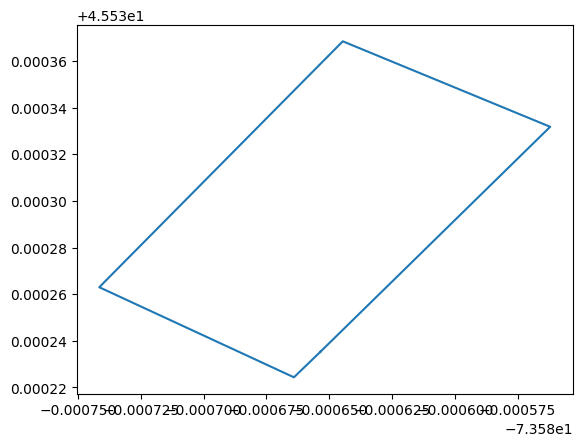

In [29]:
tb=coll[5][0]
print(tb)
query_point_x,query_point_y="-73.570552324815","45.530402345761175"
query_radius=0.00007
query_geometry = PointGQL().point(-73.580552324815,45.530402345761175)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_building_footprint_mtl = tb.query_simple( **query_options )
print("selecting {} buildings in {} m radius of point {},{}".format(len(data_building_footprint_mtl),round(query_radius*111100),query_point_x,query_point_y))
display(data_building_footprint_mtl.head())

for i in range(len(data_building_footprint_mtl)):
    vertex = data_building_footprint_mtl.iloc[i,:]["geom"]["coordinates"][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)

In [30]:
data_building_footprint_mtl

,bldg_category,bldg_id,bldg_name,bldg_orig_id,built_year,fid,geom,gml_lod,height_max,height_mean,index,ori_bldgID,shape_area,shape_len,util_code,util_id,util_label
0,Régulier,uuid_9961d067-e571-47ff-b9f4-27cc63622f37,Le-Plateau-Mont-Royal,1192595,1910,203094,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",LoD2,13,56.371159,202134,1192595,106.536469,43.360176,1000,01026825,Residential


---------- Table:0 ----------
Name:		building_footprint_ms 
Description:	 
Format:		CSV 

selecting 2 buildings in 10 m radius of point -73.570552324815,45.530402345761175


,borough_id,building_number,built_area,dwelling_number,firstletter_apt,geom,height_max,height_mean,height_stdev,index,...,max_allowed_height,max_floors,municipality_code,nad83_registration,street_name,street_number,uid,unit_category,unit_number,year_built
0,REM21,4690,279,5,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",17,10,2,8653,...,0,3,50,9843-53-0672-9-000-0000,rue De Brébeuf (MTL),4698,1026825,Régulier,0,1910
1,REM21,4700,340,4,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",17,10,2,8656,...,0,3,50,9843-43-9976-6-000-0000,rue De Brébeuf (MTL),4706,1026827,Régulier,0,1910


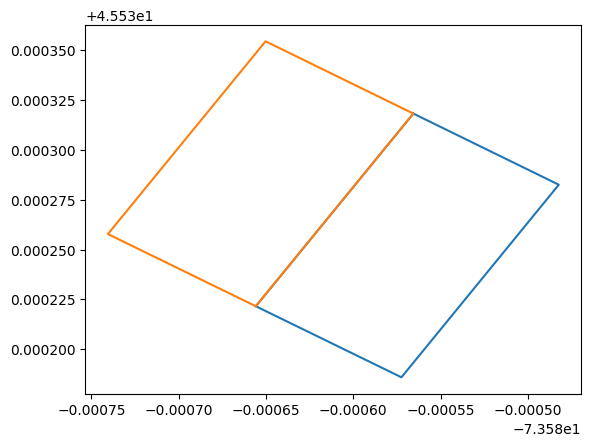

In [27]:
tb=coll[4][0]
print(tb)
query_point_x,query_point_y="-73.570552324815","45.530402345761175"
query_radius=0.00009
query_geometry = PointGQL().point(-73.580552324815,45.530402345761175)


query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': query_radius,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_building_footprint_ms = tb.query_simple( **query_options )
print("selecting {} buildings in {} m radius of point {},{}".format(len(data_building_footprint_ms),round(query_radius*111100),query_point_x,query_point_y))
display(data_building_footprint_ms.head())

for i in range(len(data_building_footprint_ms)):
    vertex = data_building_footprint_ms.iloc[i,:]["geom"]["coordinates"][0]
    polygon1=Polygon(vertex)
    plt.plot(*polygon1.exterior.xy)

In [33]:
data_building_footprint_ms.columns

Index(['borough_id', 'building_number', 'built_area', 'dwelling_number',
       'firstletter_apt', 'geom', 'height_max', 'height_mean', 'height_stdev',
       'index', 'land_area', 'landuse_code', 'landuse_text', 'lastletter_apt',
       'max_allowed_height', 'max_floors', 'municipality_code',
       'nad83_registration', 'street_name', 'street_number', 'uid',
       'unit_category', 'unit_number', 'year_built'],
      dtype='object')

: 